<a href="https://colab.research.google.com/github/jabanitaha/data-mining-2-/blob/main/LR_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step No. 1 : Load the data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


df = pd.read_csv("/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [55]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Following is the details of the columns:
1.	crim: This is the per capita crime rate by town.
2.	zn: This is the proportion of residential land zoned for lots over 25,000 sq.ft.
3.	indus: This is the proportion of non-retail business acres per town.
4.	chas: This is a Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5.	nox: This is the nitric oxides concentration (parts per 10 million).
6.	rm: This is the average number of rooms per dwelling.
7.	age: This is the proportion of owner-occupied units built prior to 1940.
8.	dis: This is the weighted distances to five Boston employment centers.
9.	rad: This is the index of accessibility to radial highways.
10.	tax: This is the full-value property-tax rate per $10,000.
11.	ptratio: This is the pupil-teacher ratio by town.
12.	b: This is calculated as 1000(Bk – 0.63)^2, where Bk is the proportion of people of African American descent by town.
13.	lstat: This is the percentage lower status of the population.



# Rename some variables and use it as new frame

In [56]:
df= df.rename(columns={'medv': 'TARGET', 'rm':'RM','lnstat':'LSTAT'})
df

,crim,zn,indus,chas,nox,RM,age,dis,rad,tax,ptratio,b,lstat,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [57]:
# Rename some variables and use it as new frame
df = df.rename(columns={'medv': 'TARGET', 'rm':'RM','lstat':'LSTAT'}) # Changed 'lnstat' to 'lstat'
df

,crim,zn,indus,chas,nox,RM,age,dis,rad,tax,ptratio,b,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [58]:
df[['LSTAT','RM','TARGET']].head()

,LSTAT,RM,TARGET
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2


# Step NO.2 Decide the Independent and dependent variables

Text(0, 0.5, 'TARGET')

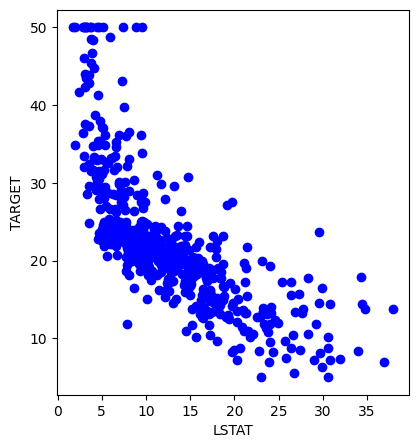

In [59]:
plt.figure(figsize=(10,5))
features=df[['LSTAT','RM']]
target=df['TARGET']
plt.subplot(1,2,1)
plt.scatter(features['LSTAT'],target,color='blue')
plt.xlabel('LSTAT')
plt.ylabel('TARGET')


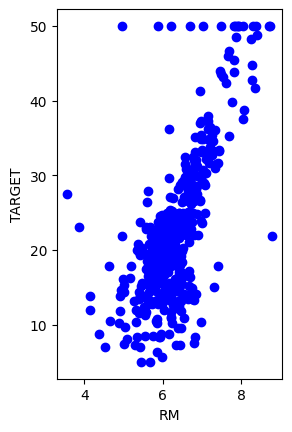

In [60]:
plt.subplot(1,2,2)
plt.scatter(features['RM'],target,color='blue')
plt.xlabel('RM')
plt.ylabel('TARGET')
plt.show()

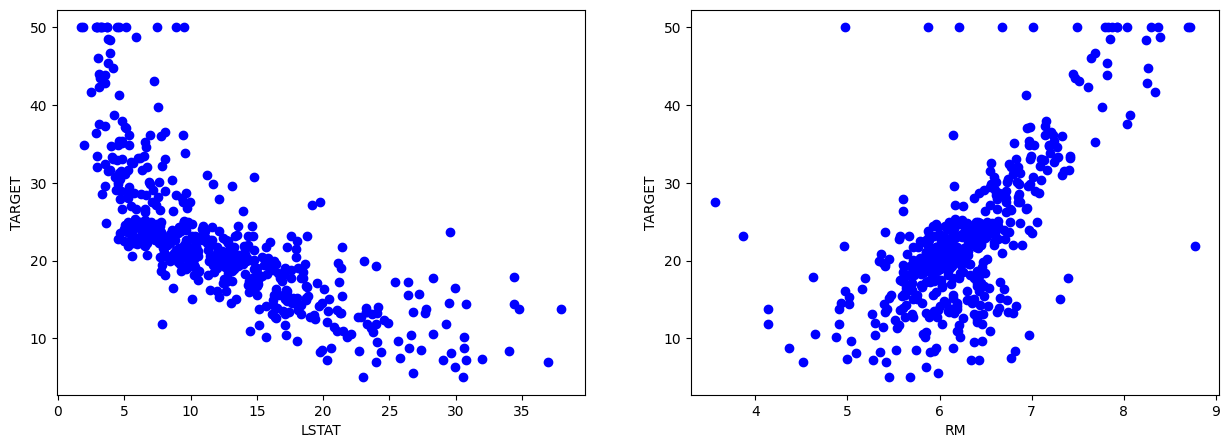

In [61]:
plt.figure(figsize=(15,5))
features=df[['LSTAT','RM']]
target=df['TARGET']
plt.subplot(1,2,1)
plt.scatter(features['LSTAT'],target,color='blue')
plt.xlabel('LSTAT')
plt.ylabel('TARGET')
plt.subplot(1,2,2)
plt.scatter(features['RM'],target,color='blue')
plt.xlabel('RM')
plt.ylabel('TARGET')
plt.show()

#Step No. 3 : Split the data into training and testing data

In [62]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=23)

#Step No.5 initialize your  model and set hyper parameters


In [63]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#Step No. 6 : Fit Your Model ,test on the testing data and create visualization

In [64]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
intercept=model.intercept_
coefficients=model.coef_
print("Intercept:",intercept)
print("Coefficients:",coefficients)

Intercept: 0.37428615187841885
Coefficients: [-0.66721079  4.88331552]


#Create visualization

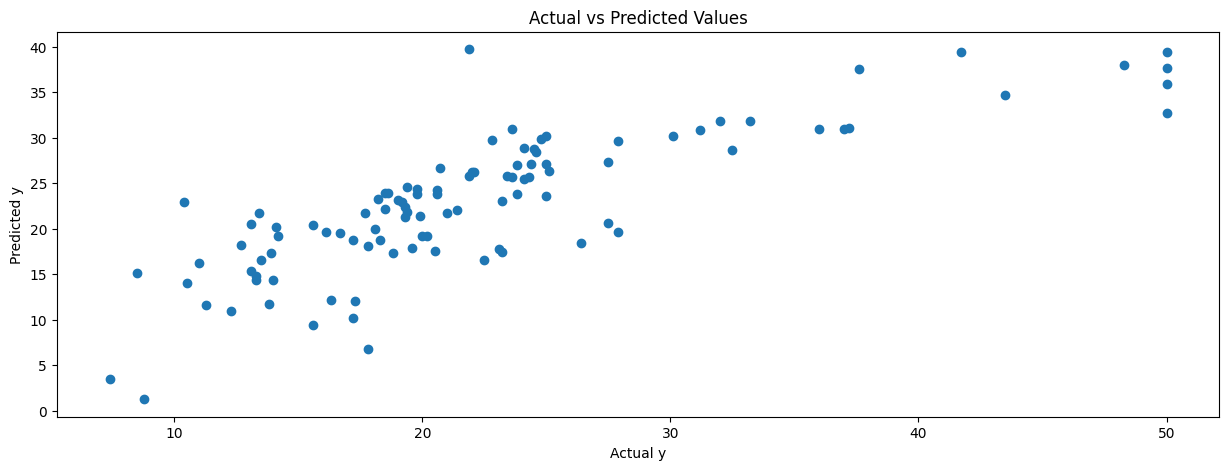

In [65]:
plt.figure(figsize=(15,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted Values')
plt.show()

#Step No.7 : Evaulate your model

In [66]:
#evulate the model
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R-squared:",r2)

Mean Squared Error: 30.726065211573893
Mean Absolute Error: 4.300122669036365
R-squared: 0.6433023932639312


#Step No. 8 Use the Model


In [67]:
new_houses_data={
    'LSTAT':[5,4,5],
    'RM':[7,6,8]
}
new_houses_df=pd.DataFrame(new_houses_data)
predicted_prices=model.predict(new_houses_df)
print("Predicted Prices:",predicted_prices)

Predicted Prices: [31.22144086 27.00533613 36.10475639]


In [68]:
new_houses_df


,LSTAT,RM
0,5,7
1,4,6
2,5,8


In [69]:
new_houses_df["Predicted Prices"]=predicted_prices
new_houses_df

,LSTAT,RM,Predicted Prices
0,5,7,31.221441
1,4,6,27.005336
2,5,8,36.104756


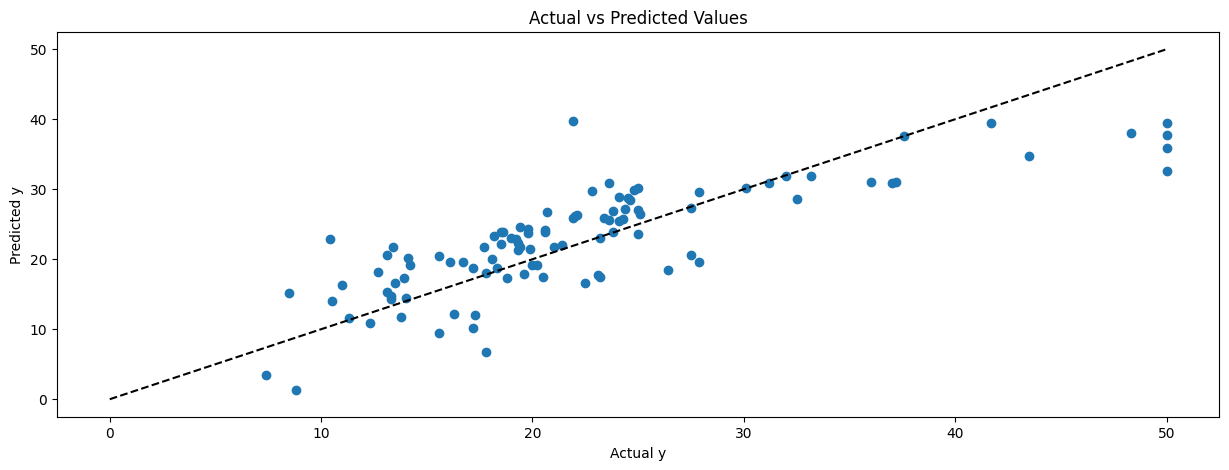

In [73]:
plt.figure(figsize=(15,5))
plt.scatter(y_test,y_pred)
plt.plot([0,50],[0,50],'k--',label="correct Prediction")
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted Values')
plt.show()